In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = [5.0, 3.0]
plt.rcParams['figure.dpi'] = 150
%matplotlib notebook

In [4]:
true_data = pd.read_csv("csv_data/srilanka.txt",sep=' ', skipinitialspace=True, \
                        skiprows=1, header=None, names=['confirmed', 'recovered', 'deaths'])
true_data

,confirmed,recovered,deaths
0,3382,3233,13
1,3388,3245,13
2,3395,3254,13
3,3402,3258,13
4,3513,3259,13
...,...,...,...
327,398801,0,7750
328,407768,0,7948
329,412370,0,8157
330,416961,0,8371


In [7]:
smoothed_data = pd.read_csv("../C++/build/release/results/srilanka_popsmooth.txt", skipinitialspace=True, \
                            header=None, names=['confirmed_true', 'deaths_true', 'confirmed_smooth', 'deaths_smooth'])
diff_data = smoothed_data.diff();
diff_data.loc[0] = 0
diff_data

,confirmed_true,deaths_true,confirmed_smooth,deaths_smooth
0,0.0,0.0,0.0,0.0
1,6.0,0.0,6.0,0.0
2,7.0,0.0,28.0,0.0
3,7.0,0.0,268.0,0.0
4,111.0,0.0,158.0,0.0
...,...,...,...,...
327,4446.0,190.0,5021.0,198.0
328,8967.0,198.0,5123.0,200.0
329,4602.0,209.0,5518.0,200.0
330,4591.0,214.0,5472.0,208.0


<IPython.core.display.Javascript object>


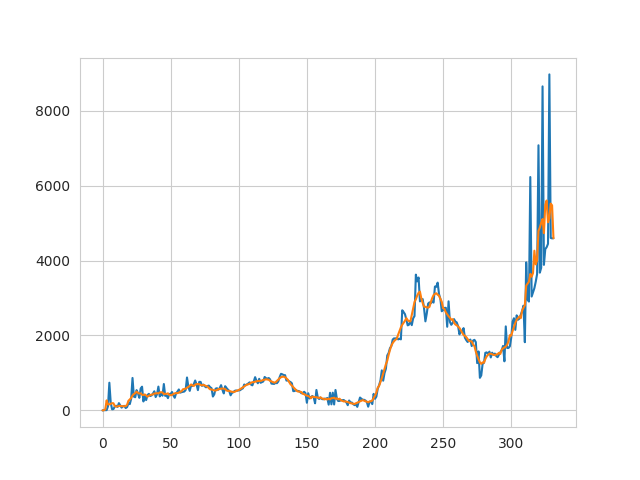

In [8]:
plt.figure()
plt.plot(diff_data['confirmed_true'])
plt.plot(diff_data['confirmed_smooth'])
plt.show()

<IPython.core.display.Javascript object>


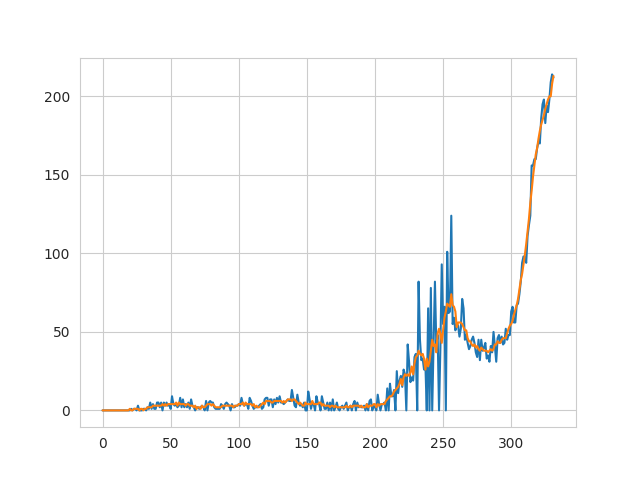

In [9]:
plt.figure()
plt.plot(diff_data['deaths_true'])
plt.plot(diff_data['deaths_smooth'])
plt.show()

Num days: 332
[0.02764908 0.02984944 0.0558649  0.10739656 0.15920914 0.18958614
 0.23408599 0.2523421  0.25929387 0.27073729 0.30686407 0.30947975
 0.35298205 0.38852939 0.39829044 0.40433789 0.41094759 0.42134153
 0.43172938 0.4476699  0.4558312  0.46842215 0.47521696 0.50466831
 0.54253798 0.57150886 0.5864571  0.59630261 0.61579548 0.6351477
 0.63873107 0.64624277 0.64990969 0.65741457 0.69656539 0.6976078
 0.73027357 0.73938822 0.79162676 0.79469181 0.89192589 0.89417552
 0.93001294 0.93326445 0.93333162 0.94172317 0.94644875 0.94943589
 0.96206863 0.99165446]
[0.         0.00228252 0.02926936 0.08272514 0.13647233 0.16798357
 0.21414497 0.23308275 0.24029408 0.25216479 0.28964049 0.29235383
 0.33748045 0.37435508 0.38448059 0.39075385 0.39761034 0.40839238
 0.4191681  0.43570382 0.44416985 0.45723092 0.46427944 0.49483047
 0.53411414 0.56416675 0.57967314 0.58988626 0.61010697 0.63018177
 0.63389894 0.64169112 0.64549496 0.65328005 0.69389272 0.69497405
 0.72885951 0.73831449 0.7

<IPython.core.display.Javascript object>


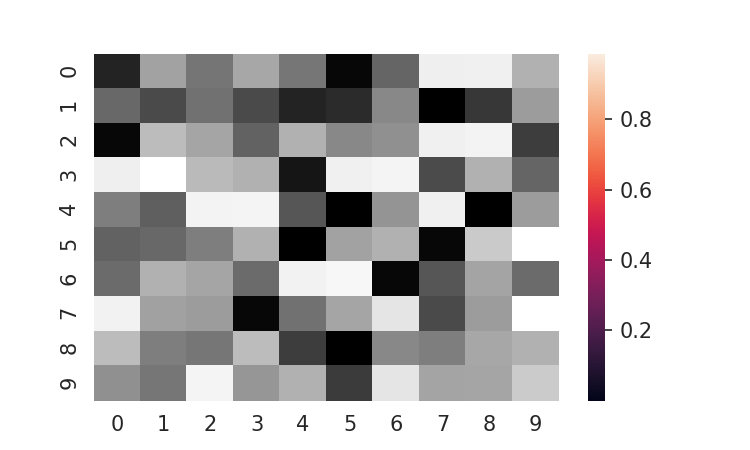

In [50]:
pred_data = pd.read_csv("../C++/build/release/results/srilanka_prediction_seed1.txt", \
                        skipinitialspace=True)
# print(pred_data)
num_days = len(pred_data)
print("Num days:", num_days)

param_data = pd.read_csv("../C++/build/release/results/srilanka_params_seed1.txt", \
                        skipinitialspace=True,header=None)
# param_data = param_data.iloc[:, ::-1];
# print(param_data)

beta = param_data.loc[0:num_days-1]
c0 = param_data.loc[  num_days:2*num_days-1]
c1 = param_data.loc[2*num_days:3*num_days-1]
c2 = param_data.loc[3*num_days:4*num_days-1]
c3 = param_data.loc[4*num_days:5*num_days-1]
IFR = param_data.loc[5*num_days:6*num_days-1]
# print(IFR)

error = param_data.loc[param_data.index[-1]]
error = np.sort(np.random.rand(50))
print(error)



scaled_error = (error - min(error)) / (max(error) - min(error))
print(scaled_error)
grey_colors = np.tile(scaled_error,[3,1]).transpose();

grey_colormap = matplotlib.colors.ListedColormap(grey_colors)
print(grey_colors)

plt.figure()
ax = sns.heatmap(np.random.rand(10,10))
ax.pcolor(np.random.rand(10,10),cmap=grey_colormap)
plt.show()

<IPython.core.display.Javascript object>


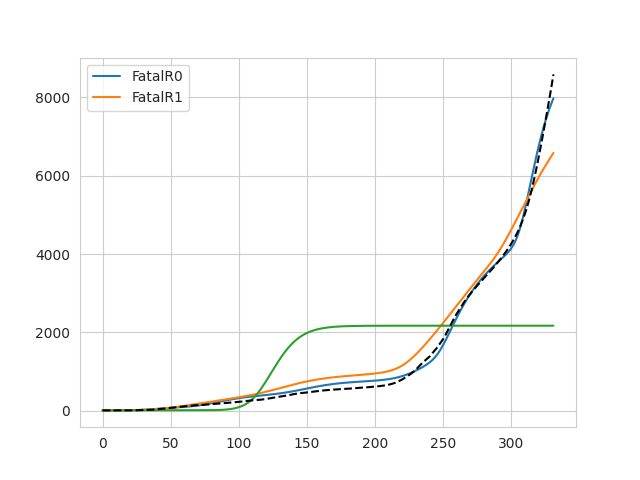

In [11]:
pred_fatal = pred_data.filter(regex=("FatalR.*"))
# print(pred_fatal)

plt.figure()
plt.plot(pred_fatal)
plt.plot(smoothed_data["deaths_smooth"],'k--')
plt.legend(["FatalR0", "FatalR1"])
plt.show()

        TotalR0     TotalR1     TotalR2
0      3395.000    3395.000    3395.000
1      3400.097    3419.528    3425.083
2      3409.617    3446.109    3455.743
3      3423.151    3474.553    3486.740
4      3440.810    3505.569    3518.033
..          ...         ...         ...
327  405217.400  415101.400  181808.900
328  406700.500  418721.600  181808.900
329  408004.900  422499.300  181808.900
330  409152.600  426441.100  181808.900
331  410162.500  430553.900  181808.900

[332 rows x 3 columns]


<IPython.core.display.Javascript object>


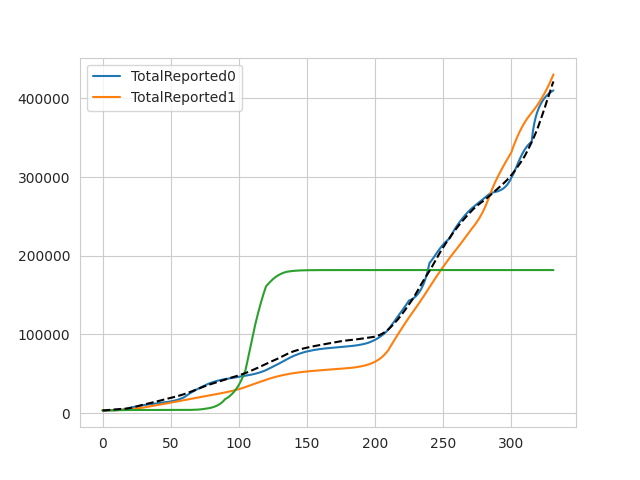

In [12]:
pred_reported = pred_data.filter(regex=("TotalR.*"))
print(pred_reported)

plt.figure()
plt.plot(pred_reported)
plt.plot(smoothed_data["confirmed_smooth"],'k--')
plt.legend(["TotalReported0", "TotalReported1"])
plt.show()

<IPython.core.display.Javascript object>


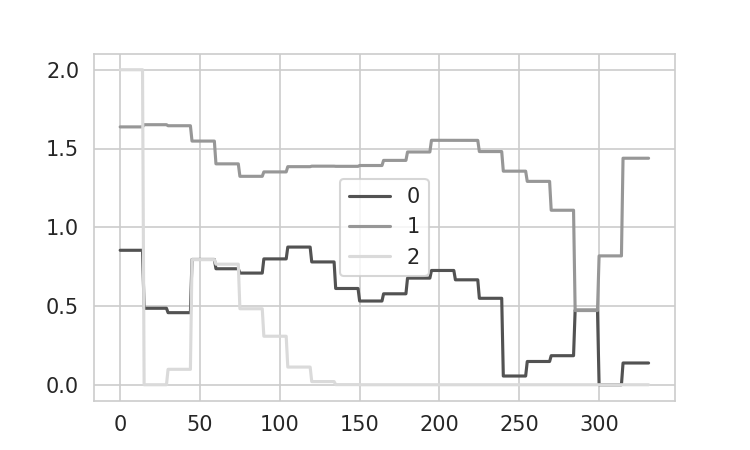

<IPython.core.display.Javascript object>


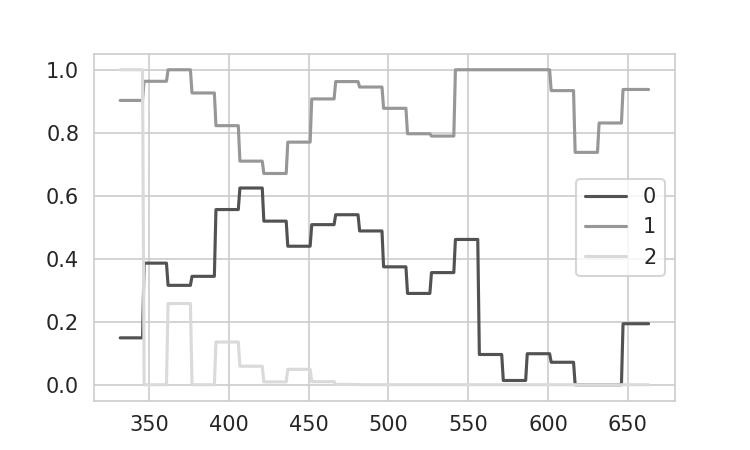

<IPython.core.display.Javascript object>


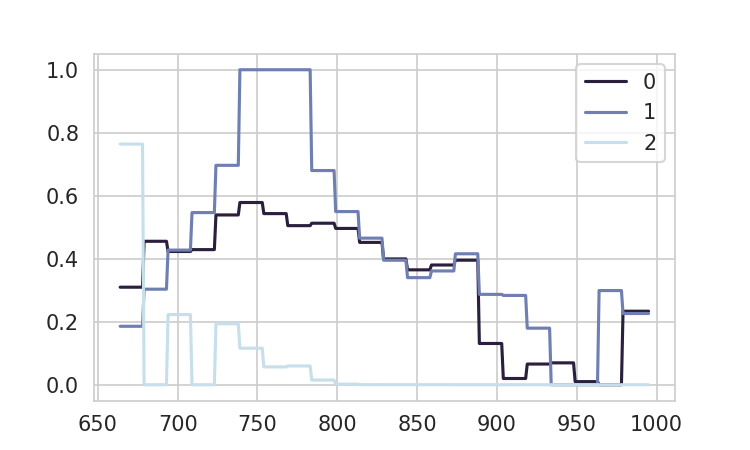

(0.9219374658653965, 0.9498758137297091, 0.9423834457343508)


In [55]:
plt.figure()
sns.lineplot(data=beta,palette="Greys_r", dashes=False)
# plt.show()

plt.figure()
sns.lineplot(data=c0,palette="Greys_r", dashes=False)
# plt.show()

plt.figure()
sns.lineplot(data=c1,palette="ch:s=.25,rot=-.25,reverse=1", dashes=False)
plt.show()

print(sns.color_palette("light:#5A9")[0])

<IPython.core.display.Javascript object>


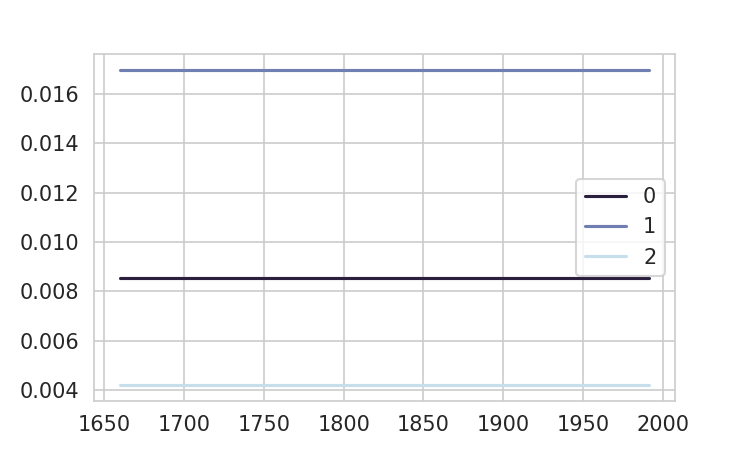

In [71]:
plt.figure()
sns.lineplot(data=IFR,palette="ch:s=.25,rot=-.25,reverse=1", dashes=False)
plt.show()